# Импорт библиотек

In [2]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score, mean_absolute_error

import sklearn
import matplotlib.pyplot as plt

from scipy import stats


# Чтение данных

In [3]:
df=pd.read_csv('Diamonds_train.csv', index_col=0)
test_data = pd.read_csv("Diamonds_test.csv", index_col=0)

# Просмотр и анализ

Рассмотрим зависимость некоторых параментров с целевой характеристикой


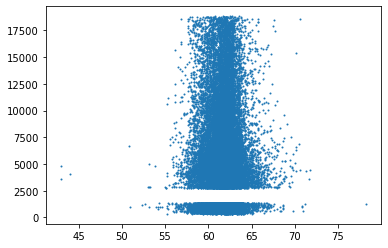

In [4]:
plt.scatter(df.depth, df.price, [1])

Цена на бриллиант не зависит от глубины

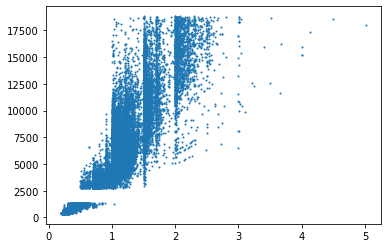

In [5]:
plt.scatter(df.carat, df.price, [1])

Можно заметить, что цена увеличивается с увеличением веса бриллинта, то есть зависимость этих показателей линейная

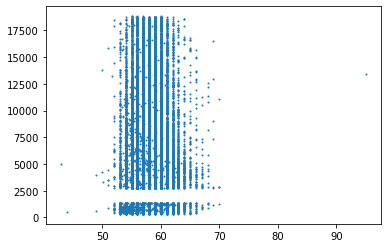

In [6]:
plt.scatter(df.table, df.price, [1])

Цена на бриллиант не зависит от показателя "table"

Рассмотрим разброс данных, на которых будет обучаться модель

<AxesSubplot:>

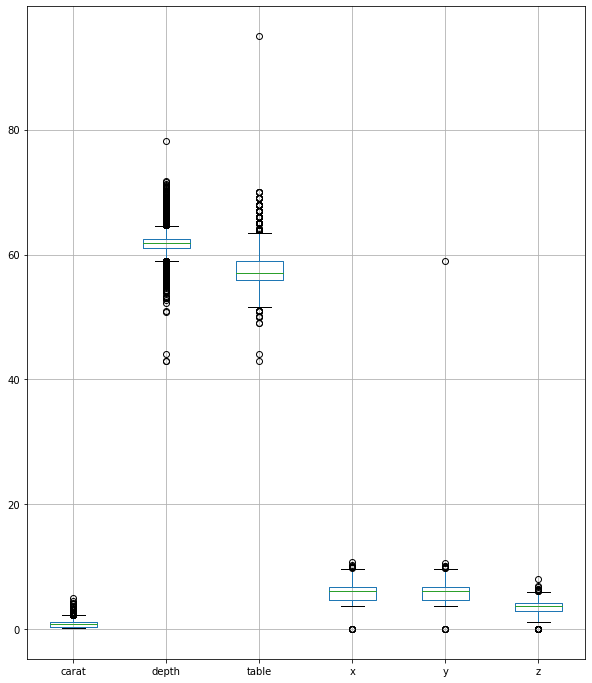

In [7]:
new_df=df.drop(['price'], axis=1)
new_test = test_data.drop(['price'], axis=1)
new_df.boxplot(figsize=(10, 12))

В данных много выбросов, значит есть высокий риск переобучиться

Посмотрим z-распределение цен

<AxesSubplot:>

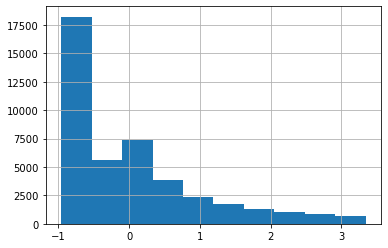

In [8]:
z = stats.zscore(df['price'])
z.hist()

In [9]:
df.describe()

,carat,depth,table,price,x,y,z
count,43152.000000,43081.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000
mean,0.850243,61.756391,57.483732,4445.475552,5.829285,5.831401,3.598703
std,0.511738,1.421175,2.213001,4300.607758,1.211473,1.229739,0.750341
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.370000,61.100000,56.000000,878.000000,4.630000,4.630000,2.840000
50%,0.900000,61.900000,57.000000,3465.000000,6.060000,6.050000,3.740000
75%,1.130000,62.500000,59.000000,6301.250000,6.700000,6.690000,4.130000
max,5.010000,78.200000,95.000000,18823.000000,10.740000,58.900000,8.060000


Количество значений в столбцах разное

In [10]:
df.isnull().sum()

carat       0
cut         0
color       0
clarity     0
depth      71
table       0
price       0
x           0
y           0
z           0
dtype: int64

Видим, что в столбце depth 71 пропуск => там нужно заменять пропуски

# Подготовка данных

Заменим пустые значения depth на средние значения этого столбца, чтобы зменнения не сильно повлияли на качество модели

In [11]:
mean_depth=df['depth'].mean()
df.loc[df.depth.isnull(), 'depth']=mean_depth
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

Все пропущенные значения заменены

Теперь нужно избавиться от категориальных данных

In [12]:
df=pd.get_dummies(df)
test_data = pd.get_dummies(test_data)
df.head(3)

,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
1,0.23,61.500000,55.0,326,3.95,3.98,2.43,0,0,1,...,0,0,0,0,0,1,0,0,0,0
2,0.21,59.800000,61.0,326,3.89,3.84,2.31,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0.23,61.756391,65.0,327,4.05,4.07,2.31,0,1,0,...,0,0,0,0,0,0,1,0,0,0


Теперь можно посмотреть на корреляцонную матрицу

In [13]:
corrM = df.corr()
corrM.price

carat            0.920963
depth           -0.015303
table            0.139423
price            1.000000
x                0.889987
y                0.874017
z                0.880380
cut_Fair         0.024518
cut_Good         0.001312
cut_Ideal       -0.103750
cut_Premium      0.092225
cut_Very Good    0.012939
color_D         -0.076313
color_E         -0.108538
color_F         -0.026899
color_G          0.010217
color_H          0.056533
color_I          0.104687
color_J          0.085915
clarity_I1      -0.001045
clarity_IF      -0.062443
clarity_SI1      0.014274
clarity_SI2      0.123159
clarity_VS1     -0.007016
clarity_VS2      0.013130
clarity_VVS1    -0.111928
clarity_VVS2    -0.057101
Name: price, dtype: float64

Видим, что цена больше всего зависит от параметров carat, x, y, z.

Разделим данные на тестовую и обучающую выборки и отделим целевую переменную.
Для теста оставим 20 процентов

In [14]:
X=df.drop(['price'], axis=1)
y=df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)
y_train = np.array(y_train)
y_test = np.array(y_test)

# Обучение модели

In [15]:
lr=LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

# Предсказания модели


In [16]:
y_pred=lr.predict(X_test)

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

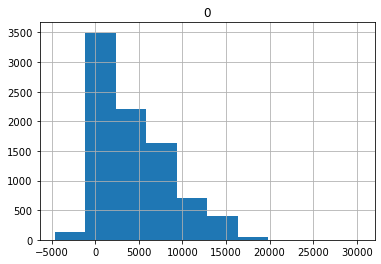

In [17]:
pd.DataFrame(y_pred).hist()

Видим, что у некоторых бриллиантов цена пресказана отрицательная, а такого не может быть. Лучше заменить эти значения на минимальное неотрицательное значение в предсказаниях

Рассчитаем метрики для сравнения моделей.

In [18]:
mse=mean_squared_error(y_test, y_pred)
mape=mean_absolute_percentage_error(y_test, y_pred)
mae=mean_absolute_error(y_test, y_pred)
r2=r2_score(y_test, y_pred)
print(mse, mape, mae, r2)

1437619.846512571 0.4272792557836463 819.6156297068705 0.9222813694240889


In [19]:
print(sorted(y_pred))
ny=[]
print(min(filter(y>0 for )))
print(list(filter(even_fn, [1, 3, 2, 5, 20, 21])))
print(y_pred)

SyntaxError: invalid syntax (2608084593.py, line 3)

In [20]:
mse=mean_squared_error(y_test, y_pred)
mape=mean_absolute_percentage_error(y_test, y_pred)
mae=mean_absolute_error(y_test, y_pred)
r2=r2_score(y_test, y_pred)
print(mse, mape, mae, r2)

1437619.846512571 0.4272792557836463 819.6156297068705 0.9222813694240889


# Оценка качества

# Оптимизация

In [21]:
y_pred=lr.predict(test_data.drop("price", axis=1))

In [22]:
mse=mean_squared_error(test_data["price"], y_pred)
mape=mean_absolute_percentage_error(test_data["price"], y_pred)
mae=mean_absolute_error(test_data["price"], y_pred)
r2=r2_score(test_data["price"], y_pred)
print(mse, mape, mae, r2)

689993.9470012977 0.4535251826626152 669.117213570634 -1.024940540245054
